## Batch: CODSOFTJUNE

### Data Science Internship

### Task 1: Titanic Survival Prediction

#### Intern: Khushboo Singh

### Business Case: 
Using the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

In [34]:
### Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
## Loading the data
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
## First five rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## Last five rows
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
## Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
## Statistical analysis
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
## Shape of data
data.shape

(891, 12)

In [8]:
## Columns of data
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
def handle_non_numerical_data(df):
    
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        # print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            # finding the unique elements
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int,df[column]))

    return df


In [10]:
y_target = data['Survived']
# Y_target.reshape(len(Y_target),1)
x_train = data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked', 'Ticket']]

x_train = handle_non_numerical_data(x_train)
x_train.head()


,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
0,3,22.0,1,1,0,7.2500,1,376
1,1,38.0,0,1,0,71.2833,2,103
2,3,26.0,0,0,0,7.9250,1,516
3,1,35.0,0,1,0,53.1000,1,267
4,3,35.0,1,0,0,8.0500,1,389


In [11]:
fare = pd.DataFrame(x_train['Fare'])
min_max_scaler = preprocessing.MinMaxScaler()  ## Feature engineering
newfare = min_max_scaler.fit_transform(fare)
x_train['Fare'] = newfare
x_train

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
0,3,22.0,1,1,0,0.014151,1,376
1,1,38.0,0,1,0,0.139136,2,103
2,3,26.0,0,0,0,0.015469,1,516
3,1,35.0,0,1,0,0.103644,1,267
4,3,35.0,1,0,0,0.015713,1,389
...,...,...,...,...,...,...,...,...
886,2,27.0,1,0,0,0.025374,1,363
887,1,19.0,0,0,0,0.058556,1,189
888,3,NaN,0,1,2,0.045771,1,490
889,1,26.0,1,0,0,0.058556,2,438


In [12]:
## Checking the null values
x_train.isnull().sum()

Pclass        0
Age         177
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Ticket        0
dtype: int64

In [13]:
# Filling the NAN values with the median values in the datasets
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].median())
print("Number of NULL values" , x_train['Age'].isnull().sum())
print(x_train.head(5))

Number of NULL values 0
   Pclass   Age  Sex  SibSp  Parch      Fare  Embarked  Ticket
0       3  22.0    1      1      0  0.014151         1     376
1       1  38.0    0      1      0  0.139136         2     103
2       3  26.0    0      0      0  0.015469         1     516
3       1  35.0    0      1      0  0.103644         1     267
4       3  35.0    1      0      0  0.015713         1     389


In [14]:
x_train['Sex'] = x_train['Sex'].replace('male', 0)
x_train['Sex'] = x_train['Sex'].replace('female', 1)
corr = x_train.corr()
corr.style.background_gradient()

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
Pclass,1.000000,-0.339898,0.131900,0.083081,0.018443,-0.549500,0.050992,0.048953
Age,-0.339898,1.000000,0.081163,-0.233296,-0.172482,0.096688,-0.014699,-0.016967
Sex,0.131900,0.081163,1.000000,-0.114631,-0.245489,-0.182333,-0.111249,0.007408
SibSp,0.083081,-0.233296,-0.114631,1.000000,0.414838,0.159651,-0.058008,-0.080244
Parch,0.018443,-0.172482,-0.245489,0.414838,1.000000,0.216225,-0.076625,0.000005
Fare,-0.549500,0.096688,-0.182333,0.159651,0.216225,1.000000,0.058462,-0.056853
Embarked,0.050992,-0.014699,-0.111249,-0.058008,-0.076625,0.058462,1.000000,-0.024065
Ticket,0.048953,-0.016967,0.007408,-0.080244,0.000005,-0.056853,-0.024065,1.000000


In [15]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [16]:
def plot_corr(df,size=10):


    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
x_train.corr() # plot_corr(x_train)
corr.style.background_gradient()

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
Pclass,1.000000,-0.339898,0.131900,0.083081,0.018443,-0.549500,0.050992,0.048953
Age,-0.339898,1.000000,0.081163,-0.233296,-0.172482,0.096688,-0.014699,-0.016967
Sex,0.131900,0.081163,1.000000,-0.114631,-0.245489,-0.182333,-0.111249,0.007408
SibSp,0.083081,-0.233296,-0.114631,1.000000,0.414838,0.159651,-0.058008,-0.080244
Parch,0.018443,-0.172482,-0.245489,0.414838,1.000000,0.216225,-0.076625,0.000005
Fare,-0.549500,0.096688,-0.182333,0.159651,0.216225,1.000000,0.058462,-0.056853
Embarked,0.050992,-0.014699,-0.111249,-0.058008,-0.076625,0.058462,1.000000,-0.024065
Ticket,0.048953,-0.016967,0.007408,-0.080244,0.000005,-0.056853,-0.024065,1.000000


### Exploratory Data Analysis

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


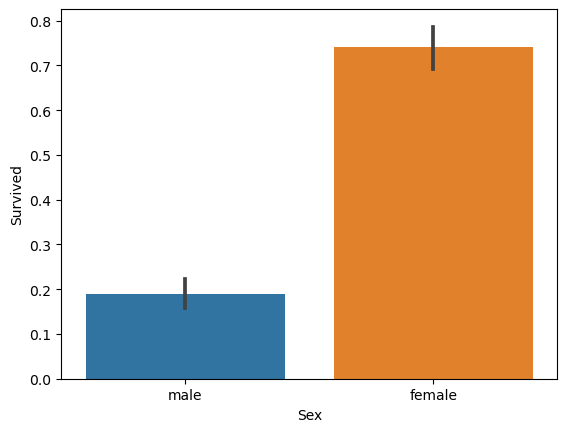

In [37]:
sns.barplot(x="Sex", y="Survived", data=data)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", data["Survived"][data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", data["Survived"][data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

* PClass

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


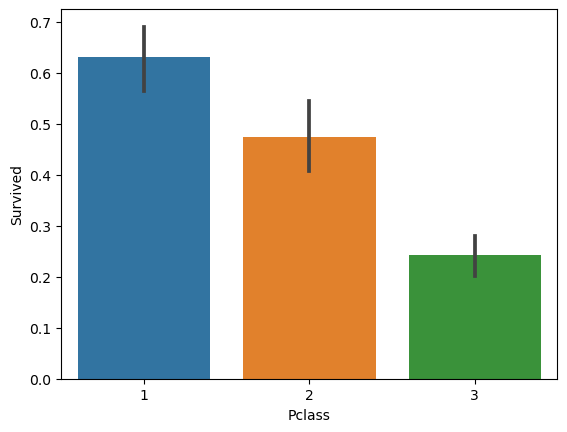

In [38]:
sns.barplot(x="Pclass", y="Survived", data=data)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", data["Survived"][data["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", data["Survived"][data["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", data["Survived"][data["Pclass"] == 3].value_counts(normalize = True)[1]*100)

* Sibsp Feature

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


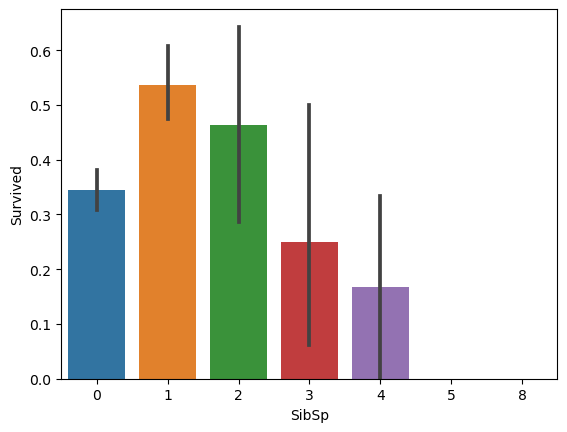

In [39]:
sns.barplot(x="SibSp", y="Survived", data=data)

print("Percentage of SibSp = 0 who survived:", data["Survived"][data["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", data["Survived"][data["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", data["Survived"][data["SibSp"] == 2].value_counts(normalize = True)[1]*100)

* Parch feature

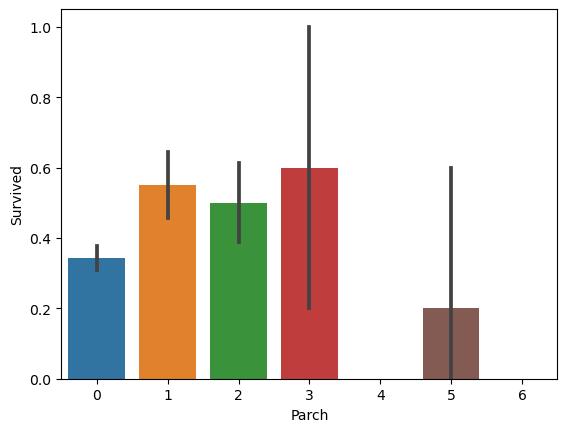

In [41]:

sns.barplot(x="Parch", y="Survived", data=data)
plt.show()

* Age feature

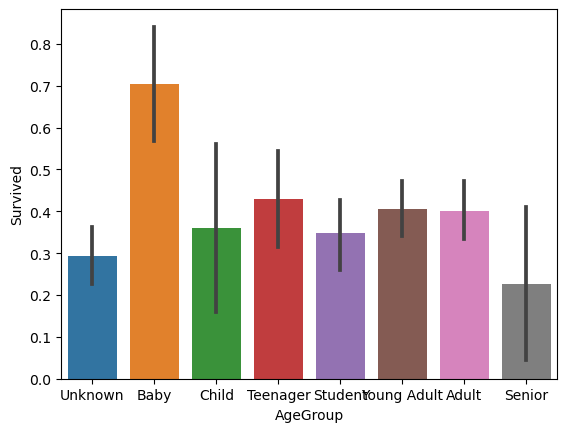

In [43]:
data["Age"] = data["Age"].fillna(-0.5)
test_data["Age"] = test_data["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data["Age"], bins, labels = labels)
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=data)
plt.show()

### Model Creation

In [17]:
# Dividing the data into train and test data set
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_target, test_size = 0.4, random_state = 40)

#### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
logreg = LogisticRegression()
logreg.fit(x_train, y_target)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, Y_test) * 100, 2)
print(acc_logreg)

80.95


#### Support Vector Classifier

In [51]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_target)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, Y_test) * 100, 2)
print(acc_svc)

62.18


#### Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_target)
y_pred = decisiontree.predict(X_test)
acc_decisiontree = round(accuracy_score(y_pred, Y_test) * 100, 2)
print(acc_decisiontree)

99.72


#### Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_target)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred,Y_test) * 100, 2)
print(acc_randomforest)

99.72


#### K Neighbours Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_target)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred, Y_test) * 100, 2)
print(acc_knn)

71.15


#### Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_target)
y_pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(y_pred, Y_test) * 100, 2)
print(acc_gbk)

91.04


In [20]:
## Testing the model.
test_data = pd.read_csv('test.csv')
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Preprocessing on the test data

In [30]:
test_data = test_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Ticket',]]
test_data = handle_non_numerical_data(test_data)

fare = pd.DataFrame(test_data['Fare'])
min_max_scaler = preprocessing.MinMaxScaler()
newfare = min_max_scaler.fit_transform(fare)
test_data['Fare'] = newfare
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Sex'] = test_data['Sex'].replace('male', 0)
test_data['Sex'] = test_data['Sex'].replace('female', 1)
print(test_data.head())

   Pclass   Age  Sex  SibSp  Parch      Fare  Embarked  Ticket
0       3  34.5    1      0      0  0.015282         2     222
1       3  47.0    0      1      0  0.013663         0      78
2       2  62.0    1      0      0  0.018909         2      81
3       3  27.0    1      0      0  0.016908         0      94
4       3  22.0    0      1      1  0.023984         0     352


In [31]:
print(clf.predict(test_data))

[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [56]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','Decision Tree','Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest,acc_decisiontree,acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.72
4,Decision Tree,99.72
5,Gradient Boosting Classifier,91.04
2,Logistic Regression,80.95
1,KNN,71.15
0,Support Vector Machines,62.18


#### Conclusion: 

Out of all the above mentioned models, Random Forest and Decision Tree is giving the most accurate result.